# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

In [11]:
def rgb_pixel_distance(p1, p2):
    return np.sqrt(np.square(p1[0] - p2[0]) + np.square(p1[1] - p2[1]) + np.square(p1[2] - p2[2]))

def get_neighbourhood(img, pi, pj, kernel_size):
    result = []
    border = kernel_size // 2

    for i in range(pi - border, pi + border + 1):
        for j in range(pj - border, pj + border + 1):
            result.append(img[(i, j)])

    return np.array(result)

def get_median_pixel(neighbourhood):
    distances = [[rgb_pixel_distance(p1, p2) for p1 in neighbourhood] for p2 in neighbourhood]

    sum_of_distances = [sum(d) for d in distances]

    return neighbourhood[np.argmin(sum_of_distances)]

def rgb_median_filter(img, kernel_size):
    filtered_img = np.copy(img)

    height, width, _ = img.shape
    border = kernel_size // 2

    for i in range(border, height - border):
        for j in range(border, height - border):

            neighbourhood = get_neighbourhood(img, i, j, kernel_size)
            filtered_img[(i, j)] = get_median_pixel(neighbourhood)

    return filtered_img

def plots(**kwargs):

    n = len(kwargs)
    fig, axes = plt.subplots(((n - 1) // 3) + 1, np.min([3, n]))
    fig.set_size_inches(np.min([n * 6, 20]), (((n - 1) // 3) + 1) * 8)
    i = 0

    for key, image in kwargs.items():
        if n <= 3:
            axes[i].imshow(image)
            axes[i].axis("off")
            axes[i].set_title(key)
        elif n > 3:
            axes[i // 3, i % 3].imshow(image)
            axes[i // 3, i % 3].set_title(key)
        i += 1

    for ax in axes.flat:
        ax.axis("off")

    plt.show()


C:\Users\48667\AppData\Local\Temp\ipykernel_24504\156843182.py:2: RuntimeWarning: overflow encountered in scalar subtract
  return np.sqrt(np.square(p1[0] - p2[0]) + np.square(p1[1] - p2[1]) + np.square(p1[2] - p2[2]))
C:\Users\48667\AppData\Local\Temp\ipykernel_24504\156843182.py:2: RuntimeWarning: overflow encountered in scalar add
  return np.sqrt(np.square(p1[0] - p2[0]) + np.square(p1[1] - p2[1]) + np.square(p1[2] - p2[2]))


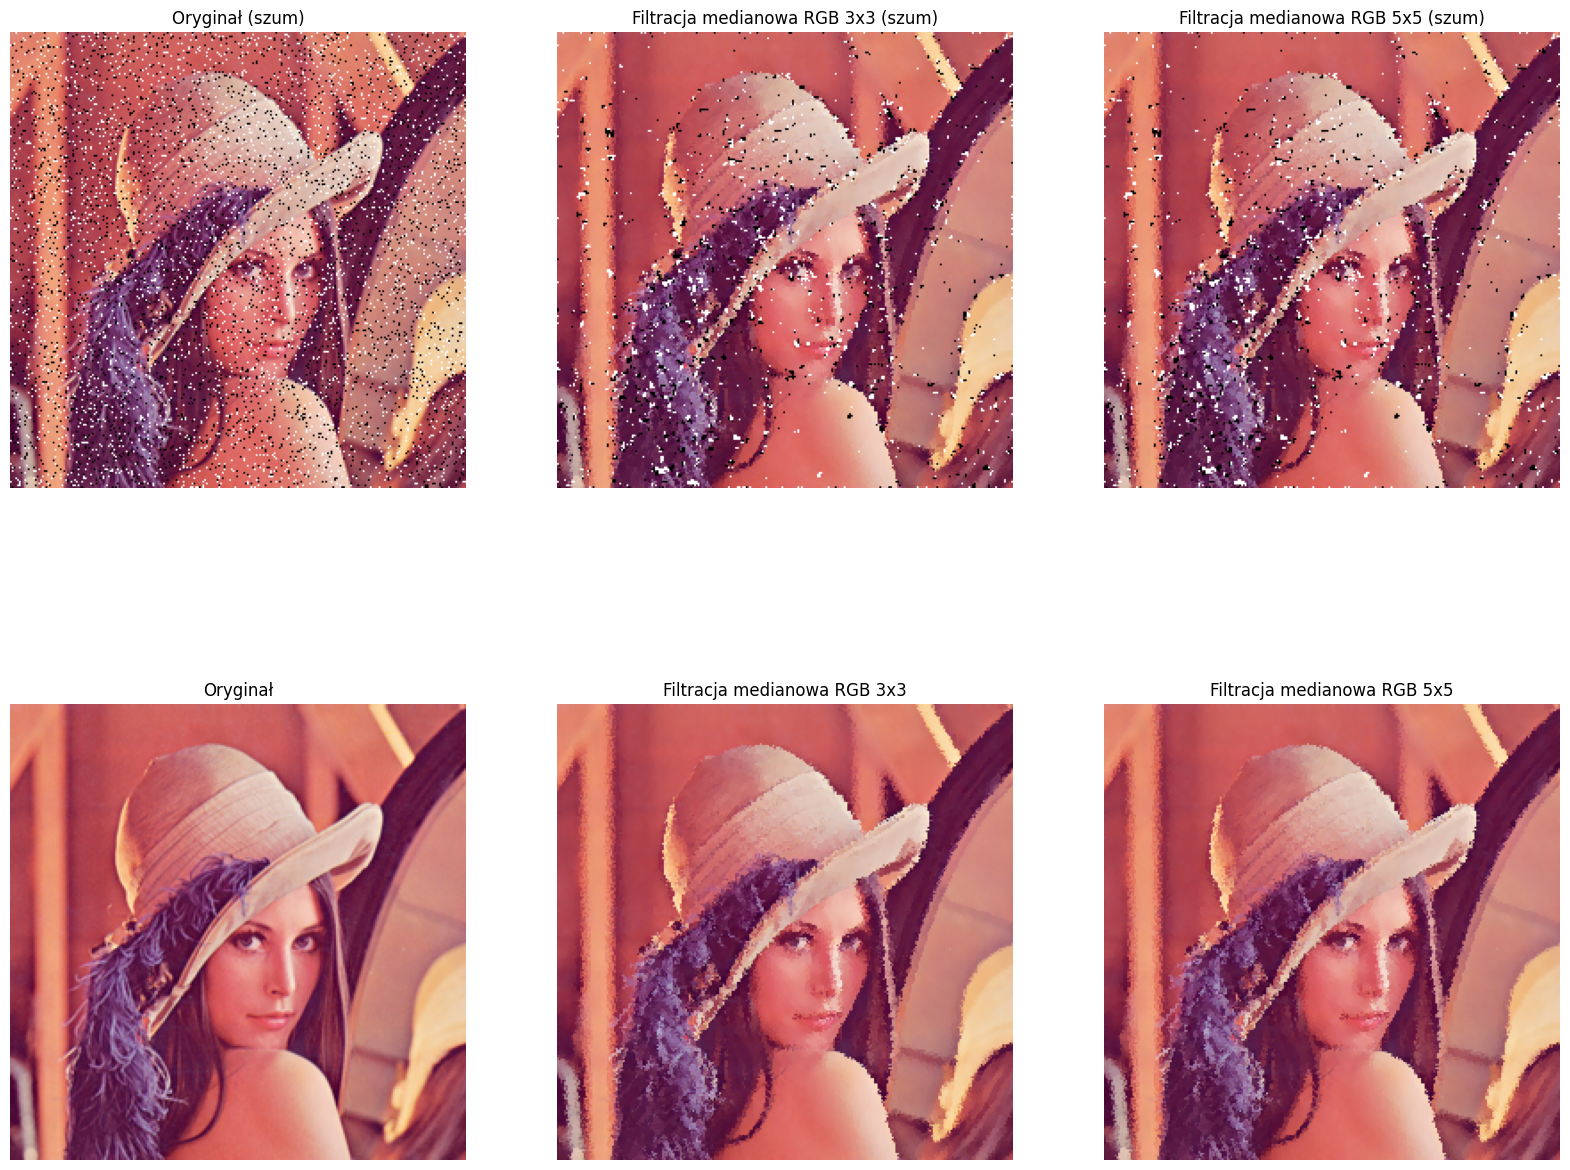

In [13]:
lena_szum = cv2.imread("lenaRGBSzum.png")
lena_szum = cv2.cvtColor(lena_szum, cv2.COLOR_BGR2RGB)

lena = cv2.imread("lenaRGB.png")
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

images = {}

images["Oryginał (szum)"] = lena_szum
images["Filtracja medianowa RGB 3x3 (szum)"] = rgb_median_filter(img=lena_szum, kernel_size=3)
images["Filtracja medianowa RGB 5x5 (szum)"] = rgb_median_filter(img=lena_szum, kernel_size=3)

images["Oryginał"] = lena
images["Filtracja medianowa RGB 3x3"] = rgb_median_filter(img=lena, kernel_size=3)
images["Filtracja medianowa RGB 5x5"] = rgb_median_filter(img=lena, kernel_size=3)

plots(**images)